<a href="https://colab.research.google.com/github/Chathuwa99/Bank-Deposit-Prediction-Project/blob/main/Bank_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#create data drame to read data set
data_set_4 = pd.read_csv('/content/Feature-Engineered Bank Data Set (3).csv')

In [3]:
data_set_4.head()

,age,default,balance,housing,loan,day,duration,campaign,pcontact,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,5,151,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,5,76,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,35,0,231,1,0,5,139,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [4]:
data_set_4.tail()

,age,default,balance,housing,loan,day,duration,campaign,pcontact,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
44918,51,0,825,0,0,17,977,3,0,0,...,0,0,0,0,0,1,0,0,0,1
44919,71,0,1729,0,0,17,456,2,0,0,...,0,0,0,0,0,1,0,0,0,1
44920,72,0,5715,0,0,17,1127,5,1,3,...,0,0,0,0,0,1,0,0,1,0
44921,57,0,668,0,0,17,508,4,0,0,...,0,0,0,0,0,1,0,0,0,1
44922,37,0,2971,0,0,17,361,2,1,11,...,0,0,0,0,0,1,0,0,0,1


In [5]:
data_set_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44923 entries, 0 to 44922
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44923 non-null  int64
 1   default              44923 non-null  int64
 2   balance              44923 non-null  int64
 3   housing              44923 non-null  int64
 4   loan                 44923 non-null  int64
 5   day                  44923 non-null  int64
 6   duration             44923 non-null  int64
 7   campaign             44923 non-null  int64
 8   pcontact             44923 non-null  int64
 9   previous             44923 non-null  int64
 10  y                    44923 non-null  int64
 11  job_blue-collar      44923 non-null  int64
 12  job_entrepreneur     44923 non-null  int64
 13  job_housemaid        44923 non-null  int64
 14  job_management       44923 non-null  int64
 15  job_retired          44923 non-null  int64
 16  job_self-employed    4

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Normalize the dataset
scaler = MinMaxScaler()
X = data_set_4.drop('y', axis=1)
Y = data_set_4['y']

# Apply MinMaxScaler to normalize features
X_normalized = scaler.fit_transform(X)

# Split into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X_normalized,Y,test_size=0.2,random_state=0,stratify= Y)


In [7]:
# Convert normalized data back to a DataFrame for clarity
import pandas as pd
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Checking the range of normalized numerical features
print("Minimum values after normalization:\n", X_normalized_df.min())
print("Maximum values after normalization:\n", X_normalized_df.max())


Minimum values after normalization:
 age                    0.0
default                0.0
balance                0.0
housing                0.0
loan                   0.0
day                    0.0
duration               0.0
campaign               0.0
pcontact               0.0
previous               0.0
job_blue-collar        0.0
job_entrepreneur       0.0
job_housemaid          0.0
job_management         0.0
job_retired            0.0
job_self-employed      0.0
job_services           0.0
job_student            0.0
job_technician         0.0
job_unemployed         0.0
marital_married        0.0
marital_single         0.0
education_secondary    0.0
education_tertiary     0.0
education_unknown      0.0
contact_other          0.0
contact_telephone      0.0
month_aug              0.0
month_dec              0.0
month_feb              0.0
month_jan              0.0
month_jul              0.0
month_jun              0.0
month_mar              0.0
month_may              0.0
month_nov         

In [8]:
import pandas as pd

# Convert the NumPy array back to a pandas DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
print(X_normalized_df.head())


        age  default   balance  housing  loan       day  duration  campaign  \
0  0.519481      0.0  0.092259      1.0   0.0  0.133333  0.053070       0.0   
1  0.337662      0.0  0.073067      1.0   0.0  0.133333  0.030704       0.0   
2  0.194805      0.0  0.072822      1.0   1.0  0.133333  0.015453       0.0   
3  0.376623      0.0  0.086476      1.0   0.0  0.133333  0.018707       0.0   
4  0.220779      0.0  0.074901      1.0   0.0  0.133333  0.028264       0.0   

   pcontact  previous  ...  month_jan  month_jul  month_jun  month_mar  \
0       0.0       0.0  ...        0.0        0.0        0.0        0.0   
1       0.0       0.0  ...        0.0        0.0        0.0        0.0   
2       0.0       0.0  ...        0.0        0.0        0.0        0.0   
3       0.0       0.0  ...        0.0        0.0        0.0        0.0   
4       0.0       0.0  ...        0.0        0.0        0.0        0.0   

   month_may  month_nov  month_oct  month_sep  poutcome_success  \
0        1.0 

In [9]:
# Display the count of training and testing data
print("Training data count:", X_train.shape[0])
print("Training target count:", Y_train.shape[0])
print("-"*50)
print("Testing data count:", X_test.shape[0])
print("Testing target count:", Y_test.shape[0])
print("-"*50)

# Count the number of 1s and 0s in Y_train
print(Y_train.value_counts())

Training data count: 35938
Training target count: 35938
--------------------------------------------------
Testing data count: 8985
Testing target count: 8985
--------------------------------------------------
y
0    31734
1     4204
Name: count, dtype: int64


In [10]:
# Calculate propability for Y_train
p_class1 = (Y_train.value_counts() / len(Y_train))[0]
p_class2 = (Y_train.value_counts() / len(Y_train))[1]

# Check for balance
if abs(p_class1 - p_class2) <= 0.05:
    print(f'Target in Y_train is balanced\n')
else:
    print(f'Target in Y_train is still imbalanced\n')

# Print class details
if p_class1 > p_class2:
    print(f"{(Y_train.unique())[0]} is majority, ({(Y_train.value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")
    print(f"{(Y_train.unique())[1]} is minority, ({(Y_train.value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
else:
    print(f"{(Y_train.unique())[1]} is majority, ({(Y_train.value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
    print(f"{(Y_train.unique())[0]} is minority, ({(Y_train.value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")


Target in Y_train is still imbalanced

0 is majority, (31734) counts and its Proportion = 88 %
1 is minority, (4204) counts and its Proportion = 12 %


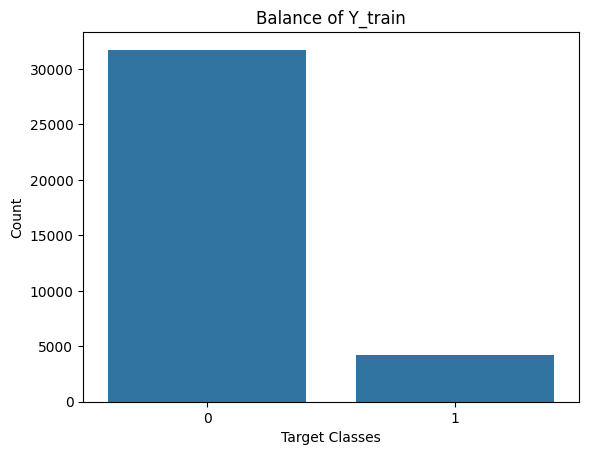

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Y_train balance
sns.countplot(x=Y_train)
plt.title("Balance of Y_train")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Apply SMOTE for the training set
sm = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = sm.fit_resample(X_train, Y_train)

# Check the class distribution after SMOTE for the training set
print("Class distribution in Y_train after SMOTE:")
print(pd.Series(Y_train_resampled).value_counts())




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution in Y_train after SMOTE:
y
0    31734
1    31734
Name: count, dtype: int64


In [13]:
p_class1 = (pd.Series(Y_train_resampled).value_counts() / len(Y_train_resampled))[0]
p_class2 = (pd.Series(Y_train_resampled).value_counts() / len(Y_train_resampled))[1]

# Check for balance
if abs(p_class1 - p_class2) <= 0.05:
    print(f'Target in Y_train_resampled is balanced\n')
else:
    print(f'Target in Y_train_resampled is still imbalanced\n')

# Print class details
if p_class1 > p_class2:
    print(f"{(pd.Series(Y_train_resampled).unique())[0]} is majority, ({(pd.Series(Y_train_resampled).value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")
    print(f"{(pd.Series(Y_train_resampled).unique())[1]} is minority, ({(pd.Series(Y_train_resampled).value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
else:
    print(f"{(pd.Series(Y_train_resampled).unique())[1]} is majority, ({(pd.Series(Y_train_resampled).value_counts())[1]}) counts and its Proportion = {round(p_class2 * 100)} %")
    print(f"{(pd.Series(Y_train_resampled).unique())[0]} is minority, ({(pd.Series(Y_train_resampled).value_counts())[0]}) counts and its Proportion = {round(p_class1 * 100)} %")

Target in Y_train_resampled is balanced

1 is majority, (31734) counts and its Proportion = 50 %
0 is minority, (31734) counts and its Proportion = 50 %


Y_train_resampled value counts:
y
0    31734
1    31734
Name: count, dtype: int64


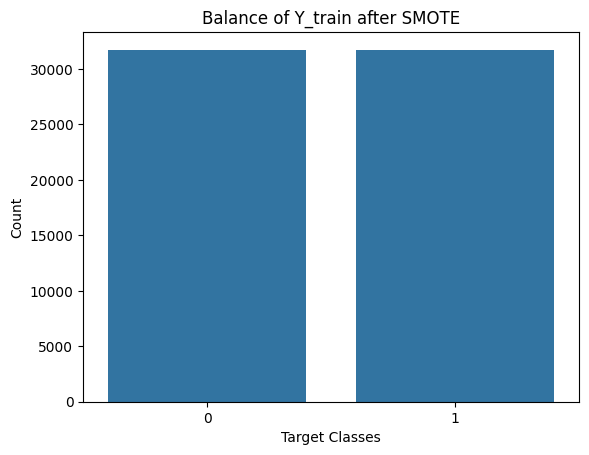

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert Y_train_resampled to a Pandas Series (if it's not already)
Y_train_resampled_series = pd.Series(Y_train_resampled)

# Check balance of Y_train_resampled
print("Y_train_resampled value counts:")
print(Y_train_resampled_series.value_counts())

# Visualize Y_train_resampled balance
sns.countplot(x=Y_train_resampled_series)
plt.title("Balance of Y_train after SMOTE")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


In [22]:
import numpy as np
import tensorflow as tf
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Building the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on resampled and normalized data
history = model.fit(X_train_resampled, Y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1984/1984 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7711 - loss: 0.4724 - val_accuracy: 0.8434 - val_loss: 0.3320
Epoch 2/50
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8752 - loss: 0.3078 - val_accuracy: 0.8432 - val_loss: 0.3231
Epoch 3/50
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8820 - loss: 0.2883 - val_accuracy: 0.8513 - val_loss: 0.3044
Epoch 4/50
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8904 - loss: 0.2755 - val_accuracy: 0.8568 - val_loss: 0.2990
Epoch 5/50
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8922 - loss: 0.2676 - val_accuracy: 0.8559 - val_loss: 0.2978
Epoch 6/50
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8950 - loss: 0.2606 - val_accuracy: 0.8597 - val_loss: 0.2985
Epoch 7/50
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8969 - loss: 0.2557 - val_accuracy: 0.8636 - val_loss: 0.2941
Epoch 8/50
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8990 - loss: 0.2504 - val_accurac

In [23]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Generate predictions for the test set
Y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# Calculate and display ROC-AUC score for the test set
test_roc_auc = roc_auc_score(Y_test, Y_test_pred)
print(f"Test Roc-Auc Score: {test_roc_auc}")

# Calculate and display accuracy score for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("\nTest Accuracy Score:")
print(test_accuracy)

# Generate predictions for the training set
Y_train_pred = (model.predict(X_train) > 0.5).astype("int32")

# Calculate and display accuracy score for the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"\nTraining Accuracy Score: {train_accuracy}")

# Calculate and display ROC-AUC score for the training set
train_roc_auc = roc_auc_score(Y_train, Y_train_pred)
print(f"Training Roc-Auc Score: {train_roc_auc}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[6918 1016]
 [ 235  816]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7934
           1       0.45      0.78      0.57      1051

    accuracy                           0.86      8985
   macro avg       0.71      0.82      0.74      8985
weighted avg       0.91      0.86      0.88      8985

Test Roc-Auc Score: 0.8241734797330115

Test Accuracy Score:
0.8607679465776293
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Training Accuracy Score: 0.9012187656519561
Training Roc-Auc Score: 0.9251846581871656


In [17]:
pip install --upgrade scikit-learn scikeras


In [18]:
import sklearn
import scikeras
print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)


scikit-learn version: 1.6.0
scikeras version: 0.13.0


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import numpy as np

# Define the function to create the model
def create_model(optimizer='adam', neurons=64, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'sgd'],  # optimizers
    'neurons': [64, 128],          # neuron choices
    'dropout_rate': [0.2, 0.3],    # dropout rates
    'batch_size': [32, 64],        # batch sizes
    'epochs': [50]                 # epochs
}

# Initialize variables to track the best model
best_model = None
best_params = None
best_score = 0

# Manual search over the simplified parameter grid
for optimizer in param_grid['optimizer']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            for batch_size in param_grid['batch_size']:
                print(f"Training with optimizer={optimizer}, neurons={neurons}, dropout_rate={dropout_rate}, batch_size={batch_size}")

                # Create and train the model
                model = create_model(optimizer=optimizer, neurons=neurons, dropout_rate=dropout_rate)
                history = model.fit(X_train_resampled, Y_train_resampled, batch_size=batch_size, epochs=param_grid['epochs'][0], verbose=0, validation_split=0.2)

                # Evaluate on validation set
                val_accuracy = max(history.history['val_accuracy'])
                print(f"Validation Accuracy: {val_accuracy}")

                # Track the best model
                if val_accuracy > best_score:
                    best_score = val_accuracy
                    best_model = model
                    best_params = {
                        'optimizer': optimizer,
                        'neurons': neurons,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'epochs': param_grid['epochs'][0]
                    }

# Print the best model and its parameters
print("Best Model Parameters:")
print(best_params)

# Evaluate the best model on the test set (if you have the test data)
test_accuracy = best_model.evaluate(X_test, Y_test)
print(f"Test Accuracy of the best model: {test_accuracy[1]}")




Training with optimizer=adam, neurons=64, dropout_rate=0.2, batch_size=32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.951630711555481
Training with optimizer=adam, neurons=64, dropout_rate=0.2, batch_size=64
Validation Accuracy: 0.9502914547920227
Training with optimizer=adam, neurons=64, dropout_rate=0.3, batch_size=32
Validation Accuracy: 0.9413896203041077
Training with optimizer=adam, neurons=64, dropout_rate=0.3, batch_size=64
Validation Accuracy: 0.9434378743171692
Training with optimizer=adam, neurons=128, dropout_rate=0.2, batch_size=32
Validation Accuracy: 0.9608476161956787
Training with optimizer=adam, neurons=128, dropout_rate=0.2, batch_size=64
Validation Accuracy: 0.9621080756187439
Training with optimizer=adam, neurons=128, dropout_rate=0.3, batch_size=32
Validation Accuracy: 0.9579328894615173
Training with optimizer=adam, neurons=128, dropout_rate=0.3, batch_size=64
Validation Accuracy: 0.9540727734565735
Training with optimizer=sgd, neurons=64, dropout_rate=0.2, batch_size=32
Validation Accuracy: 0.9303607940673828
Training with optimizer=sgd, neurons=64, dropo

In [25]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Generate predictions for the test set
Y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# Calculate and display ROC-AUC score for the test set
test_roc_auc = roc_auc_score(Y_test, Y_test_pred)
print(f"Test Roc-Auc Score: {test_roc_auc}")

# Calculate and display accuracy score for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("\nTest Accuracy Score:")
print(test_accuracy)

# Generate predictions for the training set
Y_train_pred = (model.predict(X_train) > 0.5).astype("int32")

# Calculate and display accuracy score for the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"\nTraining Accuracy Score: {train_accuracy}")

# Calculate and display ROC-AUC score for the training set
train_roc_auc = roc_auc_score(Y_train, Y_train_pred)
print(f"Training Roc-Auc Score: {train_roc_auc}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[6912 1022]
 [ 173  878]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7934
           1       0.46      0.84      0.60      1051

    accuracy                           0.87      8985
   macro avg       0.72      0.85      0.76      8985
weighted avg       0.92      0.87      0.88      8985

Test Roc-Auc Score: 0.8532910786107174

Test Accuracy Score:
0.8670005564830273
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Training Accuracy Score: 0.8687461739662753
Training Roc-Auc Score: 0.8609862401646609
